The <b>mean squared error</b> has increased. So this shows that a single feature is not a good predictor of housing prices.

** To-Do 1: Make a train-test split and calculate the mean squared error for training data and test data.**

** To-Do 2: Plot the residuals for training and test datasets**

**In the next section, we are going to read in a feather file and assemble the dataset in one Pandas dataframe that 
we can work with.**
Refer to the "explore_questionnaire.pdf" in the folder for detailed explanation of the dataset.

<img src="./w56.png"/>

To install and run feather use:

**pip install feather-format** -- or else, (if you get import error) **pip install feather-format**

In [1]:
import feather
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

# Read feather frames to individual variables

anp_df = feather.read_dataframe('data_science_case/anp.feather')
face_df = feather.read_dataframe('data_science_case/face.feather')
image_df = feather.read_dataframe('data_science_case/image_data.feather')
metrics_df = feather.read_dataframe('data_science_case/image_metrics.feather')
object_labels_df = feather.read_dataframe('data_science_case/object_labels.feather')
survey_df = feather.read_dataframe('data_science_case/survey.feather')

# Open in Pickle

In [2]:
# import pickle
# import numpy
# import pandas as pd
# import matplotlib.pyplot as plt
# from pandas.tools.plotting import scatter_matrix

# def Open_Pickle(dataframe):
#     with open (dataframe, 'rb') as f:
#         return pickle.load(f)
    
    
# anp_df = Open_Pickle('data_science_case/anp.pkl')
# face_df = Open_Pickle('data_science_case/face.pkl')
# image_df = Open_Pickle('data_science_case/image_data.pkl')
# metrics_df = Open_Pickle('data_science_case/image_metrics.pkl')
# object_labels_df = Open_Pickle('data_science_case/object_labels.pkl')
# survey_df = Open_Pickle('data_science_case/survey.pkl')

# Exploratory  section:

Moved to the Marketing_exploratory.ipynb

# Some preprocessing before merging

In [3]:
#Drop unnecessary columns in image_df dataframework
image_df.head()
drop = ['image_link','image_url','image_posted_time_unix','user_full_name',\
        'user_name','user_website','user_profile_pic','user_bio']

image_df =  image_df.drop(drop,axis=1)
image_df.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
0,1316962883971761394_3468175004,640.0,640.0,Lo-fi,14-08-2016 22:37:11,0.800521,3468175004,7.0,0.0,1.0
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0
2,594552614686078174_263042348,640.0,640.0,Vesper,22-11-2013 04:56:56,0.672679,263042348,316.0,347.0,73.0
3,553884883234370621_263042348,640.0,640.0,Amaro,27-09-2013 02:17:25,0.843525,263042348,316.0,347.0,73.0
4,725551583154452417_263042348,640.0,640.0,Amaro,21-05-2014 22:48:30,0.859796,263042348,316.0,347.0,73.0


In [4]:
#possible feature?
#add image ratio and drop height/width?

#TODO: calculate total pixels, find correlation with perma score, if non, drop the width & height, just keep the ratio

In [5]:
#Drop unnecessary columns in metrics_df dataframework
metrics_df.head()
drop = ['comment_count_time_created','like_count_time_created']
metrics_df =  metrics_df.drop(drop,axis=1)
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [6]:
#Drop unnecessary columns in survey_df dataframework---MIGHT NEED MORE  COLUMNS!!!
print 'The survey started at: '+str(survey_df['start_q'].min())
print 'The survey ended at: '+str(survey_df['end_q'].max())+'\n\n'
survey_df['start_q'] = pd.to_datetime(survey_df['start_q'], format = '%Y-%m-%d %H:%M:%S')
survey_df['end_q'] = pd.to_datetime(survey_df['end_q'], format = '%Y-%m-%d %H:%M:%S')
start_survey =survey_df['start_q'].min()
end_survey = survey_df['end_q'].max()
drop = ['participate','completed','start_q','network_id','private_account']
survey_df =  survey_df.drop(drop,axis=1)
survey_df.head()

The survey started at: 2016-12-05 14:01:21
The survey ended at: 2017-03-23 15:16:17




,id,gender,born,education,employed,income,A_2,N_1,P_1,E_1,...,end_q,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
0,920bf027f7d13dbdc7b66b3d3324903c,Male,1975,College graduate,Employed for wages,"$30,000 to $39,999",4,5,5,3,...,2016-12-05 14:02:52,5,3.0,6.0,6.0,4.0,5,5.0,5,465.0
1,b433b2bfe49e28d0b7c45925b53084e0,Male,1978,College graduate,Employed for wages,"$20,000 to $29,999",8,0,9,7,...,2016-12-05 14:03:07,9,7.0,9.0,8.0,7.0,9,0.0,9,6.0
2,4becd8768d42ffa6ef0a17d827f230a2,Male,1980,High school graduate,Self-employed,"$40,000 to $49,999",7,7,6,9,...,2016-12-05 14:03:13,6,9.0,6.0,6.0,8.0,6,7.0,6,NaN
3,01d90eeb34866d03c52925738da7865f,Male,1959,College graduate,Employed for wages,"$10,000 to $19,999",6,4,1,5,...,2016-12-05 14:03:27,1,5.0,3.0,3.0,3.0,1,4.0,1,NaN
4,f4f54676f75f47c17dc434cf68845328,Female,1990,High school graduate,Employed for wages,"$80,000 to $89,999",7,3,8,7,...,2016-12-05 14:03:52,8,7.0,8.0,8.0,7.0,8,3.0,8,767.0


# Merging of the Image elements

In [7]:
# Merge them based on the image_id so that we have a large data frame containing all the elements

image_anp_frame = pd.merge(image_df, anp_df, how='inner', on='image_id')
im_anp_obj_frame = pd.merge(image_anp_frame, object_labels_df, how='inner', on='image_id')
im_anp_obj_face_frame = pd.merge(im_anp_obj_frame, face_df, how='inner', on='image_id')


In [8]:
im_anp_obj_face_frame.shape

(3887625, 32)

In [9]:
im_anp_obj_face_frame.head()

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,face_emo,emo_confidence
0,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
1,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015
2,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SURPRISED,11.01824
3,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,HAPPY,96.51368
4,552382455733335946_263042348,612.0,612.0,Normal,25-09-2013 00:32:21,0.875568,263042348,316.0,347.0,73.0,...,False,99.655762,False,98.480972,True,87.779747,False,99.99987,SAD,2.52015


In [10]:
print 'The number of unique users who took the Survey is: '+str(len(survey_df['insta_user_id'].unique()))
print 'The number of unique users in  the image data-set is: '+str(len(im_anp_obj_face_frame['user_id'].unique()))

The number of unique users who took the Survey is: 329
The number of unique users in  the image data-set is: 144


It seems that there is a conflict between the <b>'user-id'</b> in the <b>im_anp_obj_face_frame</b> dataframe and the <b>'insta_user_id'</b> in the <b>survey_df</b> dateframe. This conflict exists because the two columns are from different format (one is a string and the other a float). In  order to be able to merge them we need to convert the string values to  float.

In [11]:
im_anp_obj_face_frame['user_id'] = im_anp_obj_face_frame['user_id'].apply(lambda x : float(x))

In [12]:
#convert all the image_posted_time strings to datime object for tracking the year of creation
im_anp_obj_face_frame['image_posted_time'] = pd.to_datetime(im_anp_obj_face_frame['image_posted_time'], format = '%d-%m-%Y %H:%M:%S' )

In [13]:
print start_survey
print end_survey  

2016-12-05 14:01:21
2017-03-23 15:16:17


In [14]:
from dateutil.relativedelta import relativedelta
import datetime

def change_time_intervals(time,  num_months):
    three_mon_rel = relativedelta(months=num_months)
    return time +three_mon_rel

#test the function
change_time_intervals(end_survey,-3)

Timestamp('2016-12-23 15:16:17')

In [15]:
last_years_images = im_anp_obj_face_frame[(im_anp_obj_face_frame.image_posted_time>=change_time_intervals(start_survey,-12)) & (im_anp_obj_face_frame.image_posted_time<=change_time_intervals(end_survey,12) )]
print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'
print last_years_images.shape

The last year dataframe has 129 users.
(1078002, 32)


In [16]:
# last_years_images = im_anp_obj_face_frame[(im_anp_obj_face_frame.image_posted_time>=change_time_intervals(end_survey,-6)) & (im_anp_obj_face_frame.image_posted_time<=change_time_intervals(start_survey,6) )]
# print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'
# print test.shape

In [17]:
#keeps only the last two year images of the users
# years = ['2016','2017']
# last_years = im_anp_obj_face_frame['image_posted_time'].apply(lambda x : True if str(x.year) in years else False)
# last_years_images = im_anp_obj_face_frame[last_years.values]
# print 'The last year dataframe has '+ str(len(last_years_images['user_id'].unique()))+' users.'

In [18]:
#merge the image dataframe with the survey dataframe 
image_survey = pd.merge(last_years_images,survey_df,left_on='user_id',right_on = 'insta_user_id')
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(1126773, 72)
The merging dataframe has 129 users.


# Further Pre-Processing

Because there are some missing values (NaN)  in the of the explanatory variables of the merging dataframework we need to further pre process our data by excluding the rows that have NaN values.

In [19]:
image_survey = image_survey.dropna()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(1123833, 72)
The merging dataframe has 128 users.


In [20]:
#drop duplicates
image_survey = image_survey.drop_duplicates()
print image_survey.shape
print 'The merging dataframe has '+ str(len(image_survey['user_id'].unique()))+' users.'

(1008036, 72)
The merging dataframe has 128 users.


In [21]:
image_survey.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,end_q,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
696555,1161006824761914438_143763900,800.0,640.0,Normal,2016-01-12 18:20:20,0.908659,143763900.0,456.0,190.0,772.0,...,2016-12-05 20:51:36,8,9.0,6.0,8.0,6.0,8,5.0,8,771.0
991748,1515611044633763737_703978203,800.0,640.0,Normal,2017-05-16 00:35:37,0.874735,703978203.0,687.0,376.0,2277.0,...,2017-02-08 23:48:25,7,7.0,4.0,4.0,6.0,7,4.0,7,1530.0
28299,1321454214052199755_287562303,799.0,640.0,Rise,2016-08-21 03:20:39,0.815217,287562303.0,456.0,373.0,156.0,...,2016-12-05 14:32:07,7,8.0,8.0,6.0,5.0,7,9.0,7,156.0
283131,1422573176780620696_6734387,799.0,640.0,Normal,2017-01-07 15:45:59,0.882939,6734387.0,1047.0,888.0,465.0,...,2016-12-05 15:00:59,6,6.0,7.0,7.0,6.0,6,8.0,6,464.0
748876,1202488233143325392_249861555,480.0,640.0,Normal,2016-03-09 23:56:29,0.754503,249861555.0,445.0,5154.0,691.0,...,2017-02-08 14:57:12,6,7.0,5.0,7.0,6.0,6,9.0,6,689.0


In [22]:
image_survey.ix[:,:10].sample(5)

/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos
145117,1362648283646251586_494837119,640.0,640.0,Normal,2016-10-16 23:25:55,0.862590,4.948371e+08,355.0,585.0,239.0
774625,1342344077597668856_249861555,800.0,640.0,Normal,2016-09-18 23:05:05,0.771359,2.498616e+08,445.0,5154.0,691.0
144514,1255928925786284800_494837119,800.0,640.0,Normal,2016-05-22 17:33:36,0.804370,4.948371e+08,355.0,585.0,239.0
887724,1477871626379873892_2932434558,335.0,640.0,Normal,2017-03-24 22:54:08,0.783256,2.932435e+09,284.0,432.0,108.0
171513,1422576568362824617_13745951,640.0,640.0,Normal,2017-01-07 15:52:43,0.733763,1.374595e+07,161.0,217.0,720.0


# Correlation Coefficients

In [23]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix = im_anp_obj_face_frame.corr()
correlation_matrix

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence
image_height,1.000000,0.367477,0.092194,-0.032317,-0.044179,-0.110193,0.056780,0.015892,0.006732,0.014332,...,0.000161,-0.010690,0.010262,-0.007228,0.008502,0.000130,0.008904,0.004826,0.016588,-0.000509
image_width,0.367477,1.000000,-0.048363,0.024987,0.032737,-0.051495,0.062664,-0.008777,-0.003462,0.000225,...,0.001980,0.027605,-0.015589,0.031723,-0.013112,-0.018547,-0.009949,0.008953,0.003785,-0.004968
data_memorability,0.092194,-0.048363,1.000000,-0.028486,-0.010293,-0.046380,-0.067173,0.106849,0.055681,0.032926,...,-0.032094,-0.063643,0.047527,-0.037170,0.044731,0.052936,0.044846,-0.033755,0.083209,-0.003185
user_id,-0.032317,0.024987,-0.028486,1.000000,0.010289,0.067582,-0.166396,-0.014089,-0.012419,-0.003699,...,0.021957,0.033926,-0.049911,0.039764,-0.052432,-0.041536,-0.065157,0.014768,-0.028688,-0.016735
user_followed_by,-0.044179,0.032737,-0.010293,0.010289,1.000000,0.300155,0.150294,-0.011532,0.002684,0.006521,...,-0.011087,0.043988,-0.028013,0.046854,-0.025272,-0.082719,-0.052183,-0.024712,-0.008538,-0.013778
user_follows,-0.110193,-0.051495,-0.046380,0.067582,0.300155,1.000000,0.040369,-0.017019,0.003237,-0.003662,...,0.013937,0.004460,-0.005718,-0.005291,0.001897,0.007140,0.011807,0.010431,-0.003827,0.005050
user_posted_photos,0.056780,0.062664,-0.067173,-0.166396,0.150294,0.040369,1.000000,-0.054813,-0.050928,-0.002424,...,0.018212,0.061977,-0.010526,0.064271,-0.019818,-0.064448,-0.019717,0.083662,-0.024243,-0.005419
anp_sentiment,0.015892,-0.008777,0.106849,-0.014089,-0.011532,-0.017019,-0.054813,1.000000,0.339011,0.005725,...,-0.029941,-0.031011,0.020933,-0.023893,0.019850,0.042821,0.030767,-0.042127,0.017479,0.004419
emotion_score,0.006732,-0.003462,0.055681,-0.012419,0.002684,0.003237,-0.050928,0.339011,1.000000,0.008191,...,-0.007838,-0.029593,0.021920,-0.027413,0.023165,0.039717,0.029398,-0.019903,0.015404,0.006878
data_amz_label_confidence,0.014332,0.000225,0.032926,-0.003699,0.006521,-0.003662,-0.002424,0.005725,0.008191,1.000000,...,-0.002400,0.000109,-0.003093,-0.004050,0.001187,0.002615,-0.001492,-0.004318,0.007987,-0.001657


** To-Do 3: Plot the correlation matrix with color codes corresponding to the how much two attributes are correlated. **

** To-Do 4: Calculate the Spearman rank for the attributes. **

### ASSIGNMENT

In this notebook we learned how to train and test a regressor on numerical data. For this assignment you are required to do the following:

1. Split the data into training and testing splits
2. Train a regressor to predict the PERMA scores on the test set using different sets of attributes (not all of them at once)
3. Analyze which features (attributes) correlate well with each other and help in fitting the curve to the data better.
4. Elaborate on the results.

In [24]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# TO-DO:3


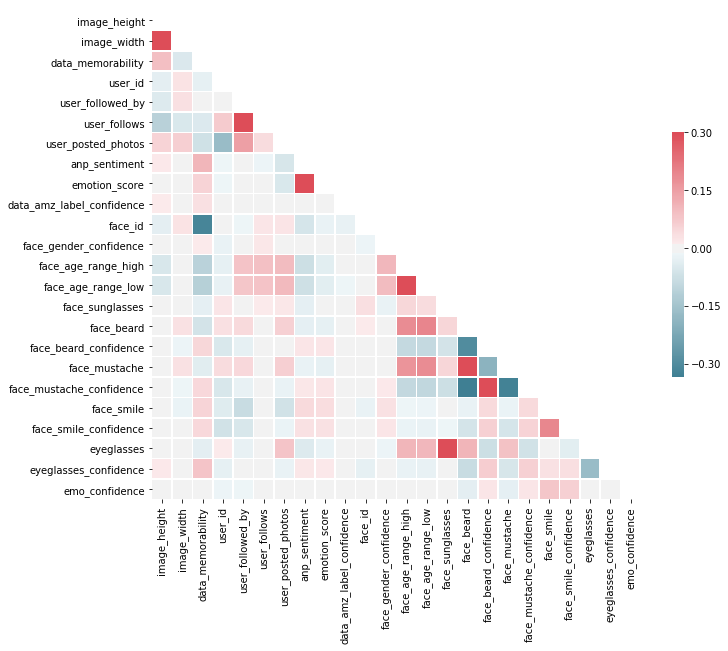

In [25]:

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
# Calculate the correlation coefficients. Notice how the main diagonal is 1.00

correlation_matrix_survey = image_survey.corr()
correlation_matrix_survey

,image_height,image_width,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,...,insta_user_id,P,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount
image_height,1.000000,0.303307,0.179606,-0.067827,-0.071024,-0.130390,0.085974,0.035057,0.007178,0.022071,...,-0.067827,-0.007990,-0.025244,0.014499,-0.024898,-0.069062,-0.007990,0.040442,-0.007990,0.096611
image_width,0.303307,1.000000,-0.042769,-0.083996,0.010457,-0.075285,0.060386,0.004586,-0.002069,-0.002750,...,-0.083996,0.070022,0.060607,0.038902,0.025749,-0.004127,0.070022,-0.053926,0.070022,0.065613
data_memorability,0.179606,-0.042769,1.000000,-0.025228,-0.048722,-0.064832,-0.069961,0.124727,0.047192,0.030079,...,-0.025228,0.045898,-0.009797,-0.023026,-0.010550,-0.015771,0.045898,0.049011,0.045898,-0.061638
user_id,-0.067827,-0.083996,-0.025228,1.000000,-0.022794,0.035220,-0.218800,-0.025197,-0.010647,-0.007135,...,1.000000,-0.037077,0.000710,-0.028580,-0.065724,0.153824,-0.037077,0.057355,-0.037077,-0.302926
user_followed_by,-0.071024,0.010457,-0.048722,-0.022794,1.000000,0.275365,0.249095,-0.029490,-0.013911,0.015498,...,-0.022794,-0.013321,0.131206,-0.079415,-0.126754,0.002250,-0.013321,-0.126586,-0.013321,0.180924
user_follows,-0.130390,-0.075285,-0.064832,0.035220,0.275365,1.000000,-0.043284,-0.024688,0.008862,0.003241,...,0.035220,-0.189838,0.124812,-0.199081,-0.019608,0.008197,-0.189838,0.186529,-0.189838,-0.033434
user_posted_photos,0.085974,0.060386,-0.069961,-0.218800,0.249095,-0.043284,1.000000,-0.086173,-0.085246,-0.000561,...,-0.218800,-0.030363,-0.143203,-0.361405,-0.287251,-0.100246,-0.030363,-0.226780,-0.030363,0.936702
anp_sentiment,0.035057,0.004586,0.124727,-0.025197,-0.029490,-0.024688,-0.086173,1.000000,0.347169,0.005185,...,-0.025197,0.039442,0.035854,0.052837,0.060692,0.007997,0.039442,0.036271,0.039442,-0.081606
emotion_score,0.007178,-0.002069,0.047192,-0.010647,-0.013911,0.008862,-0.085246,0.347169,1.000000,0.006355,...,-0.010647,0.021670,0.034140,0.038294,0.045686,0.012051,0.021670,0.029256,0.021670,-0.082995
data_amz_label_confidence,0.022071,-0.002750,0.030079,-0.007135,0.015498,0.003241,-0.000561,0.005185,0.006355,1.000000,...,-0.007135,-0.006380,0.004039,0.004193,0.002113,-0.006106,-0.006380,0.012414,-0.006380,0.001582


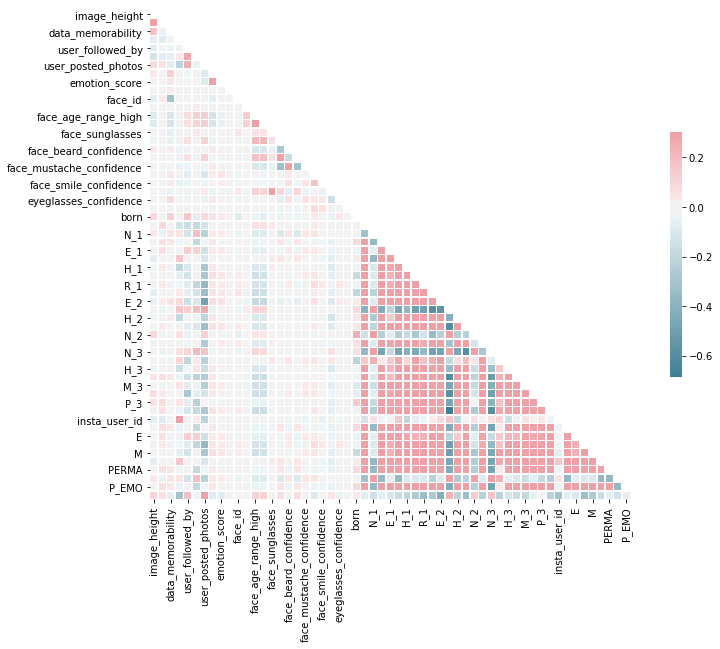

In [27]:
mask = np.zeros_like(correlation_matrix_survey, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_survey, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Linear Regression

# TO-DO:1

In [28]:
from sklearn.cross_validation import train_test_split

independent_variables = image_survey[list(correlation_matrix)]
dependent_variables = image_survey['PERMA']

x_train, x_test,  y_train, y_test = train_test_split(independent_variables,dependent_variables,test_size=0.2)


/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
print x_train.shape
print x_test.shape

print y_train.shape
print y_test.shape

(806428, 24)
(201608, 24)
(806428,)
(201608,)


# TO-DO:2 

In [30]:
from sklearn.linear_model import LinearRegression
import time

start = time.time()
#This creates a LinearRegression object
lm = LinearRegression()
# Train the model using the training sets
lm.fit(x_train, y_train)

end = time.time()
print(end - start)


1.35929107666


In [31]:
# Make predictions using the testing set
insta_y_pred = lm.predict(x_test)

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, insta_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, insta_y_pred))

('Coefficients: \n', array([ -7.97290133e-04,   3.32740011e-03,   1.30811511e+00,
        -8.24657981e-11,   1.28185307e-04,  -2.55678750e-04,
        -1.18964763e-04,   9.23473495e-02,   2.19385459e-01,
        -1.29031273e-03,   3.03657100e-04,   2.40996953e-03,
         7.09368539e-03,  -1.23125797e-02,   2.06570397e-01,
         1.69744906e-01,  -2.75295732e-03,   9.72712877e-02,
         9.02420708e-04,  -1.05252864e-01,  -2.66978837e-03,
        -2.40202677e-01,  -1.95457790e-03,  -8.49787461e-05]))
Mean squared error: 2.32
Variance score: 0.06


# Different linear library

In [33]:
import statsmodels.formula.api as smf

#REFERENCE---->http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

columns =list(correlation_matrix)



In [34]:
value ='PERMA~'+ '+'.join(columns)

print value

PERMA~image_height+image_width+data_memorability+user_id+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_id+face_gender_confidence+face_age_range_high+face_age_range_low+face_sunglasses+face_beard+face_beard_confidence+face_mustache+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [35]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula=value, data=image_survey).fit()

# print the coefficients
lm1.params

Intercept                    4.535606e+00
face_sunglasses[T.True]      2.099781e-01
face_beard[T.True]           1.624408e-01
face_mustache[T.True]        1.012232e-01
face_smile[T.True]          -1.037821e-01
eyeglasses[T.True]          -2.394791e-01
image_height                -7.992156e-04
image_width                  3.321865e-03
data_memorability            1.312384e+00
user_id                     -8.350093e-11
user_followed_by             1.297148e-04
user_follows                -2.563928e-04
user_posted_photos          -1.184300e-04
anp_sentiment                8.945848e-02
emotion_score                2.279734e-01
data_amz_label_confidence   -1.183749e-03
face_id                      3.063411e-04
face_gender_confidence       2.406780e-03
face_age_range_high          7.243560e-03
face_age_range_low          -1.247097e-02
face_beard_confidence       -2.740329e-03
face_mustache_confidence     8.462170e-04
face_smile_confidence       -2.689993e-03
eyeglasses_confidence       -1.988

In [36]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     2647.
Date:                Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:34:11   Log-Likelihood:            -1.8540e+06
No. Observations:             1008036   AIC:                         3.708e+06
Df Residuals:                 1008011   BIC:                         3.708e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.5356      0.055     82.946      0.000       4.428       4.643
face_sunglasses[T.True]       0.2100      0.005     38.225      0.000       0.199       0.221
face_beard[T.True]            0.1624      0.005     30.248      0.000       0.152       0.173
face_mustache[T.True]         0.1012      0.006     18.016      0.000       0.090       0.112
face_smile[T.True]           -0.1038      0.003    -29.798      0.000      -0.111      -0.097
eyeglasses[T.True]           -0.2395      0.004    -60.946      0.000      -0.247      -0.232
image_height                 -0.0008   1.47e-05    -54.264      0.000      -0.001      -0.001
image_width                   0.0033   4.65e-05     71.398      0.000       0.003       0.003
data_memorability             1.3124      0.031     42.967      0.000       1.253       1.372
user_id                    -8.35e-11   2.03e-12    -41.087      0.000   -8.75e-11   -7.95e-11
user_followed_by              0.0001    2.9e-06     44.702      0.000       0.000       0.000
user_follows                 -0.0003   1.33e-06   -192.575      0.000      -0.000      -0.000
user_posted_photos           -0.0001   2.06e-06    -57.535      0.000      -0.000      -0.000
anp_sentiment                 0.0895      0.004     23.037      0.000       0.082       0.097
emotion_score                 0.2280      0.023      9.986      0.000       0.183       0.273
data_amz_label_confidence    -0.0012      0.000     -7.205      0.000      -0.002      -0.001
face_id                       0.0003   4.82e-05      6.361      0.000       0.000       0.000
face_gender_confidence        0.0024      0.000      8.661      0.000       0.002       0.003
face_age_range_high           0.0072      0.001     12.631      0.000       0.006       0.008
face_age_range_low           -0.0125      0.001    -15.462      0.000      -0.014      -0.011
face_beard_confidence        -0.0027      0.000    -18.450      0.000      -0.003      -0.002
face_mustache_confidence      0.0008      0.000      5.315      0.000       0.001       0.001
face_smile_confidence        -0.0027      0.000    -24.384      0.000      -0.003      -0.002
eyeglasses_confidence        -0.0020      0.000    -12.887      0.000      -0.002      -0.002
emo_confidence            -9.593e-05   4.31e-05     -2.227      0.026      -0.000   -1.15e-05
==============================================================================
Omnibus:                    20746.133   Durbin-Watson:                   0.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28870.739
Skew:                          -0.249   Prob(JB):                         0.00
Kurtosis:                       3.663   Cond. No.                     3.57e+10
========================================================

In [37]:
# calculate r-square 
lm1.rsquared

0.059277561860967221

In [38]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,4.428432e+00,4.642780e+00
face_sunglasses[T.True],1.992116e-01,2.207445e-01
face_beard[T.True],1.519152e-01,1.729664e-01
face_mustache[T.True],9.021096e-02,1.122354e-01
face_smile[T.True],-1.106083e-01,-9.695579e-02
eyeglasses[T.True],-2.471805e-01,-2.317777e-01
image_height,-8.280827e-04,-7.703484e-04
image_width,3.230676e-03,3.413055e-03
data_memorability,1.252520e+00,1.372249e+00
user_id,-8.748413e-11,-7.951773e-11


In [39]:
y_predict = lm1.predict(x_test)
y_predict.head()

1092306    6.407426
326518     7.185006
974657     6.523045
1126435    6.479006
626745     5.131970
dtype: float64

In [40]:
#sklearn predictions
insta_y_pred[:5]

array([ 6.40902496,  7.19052189,  6.52124718,  6.4773604 ,  5.14125945])

# Plot the residuals

In [41]:
residuals = y_test - insta_y_pred
residuals.head()

1092306   -0.409025
326518     2.809478
974657     1.478753
1126435   -0.477360
626745    -3.141259
Name: PERMA, dtype: float64

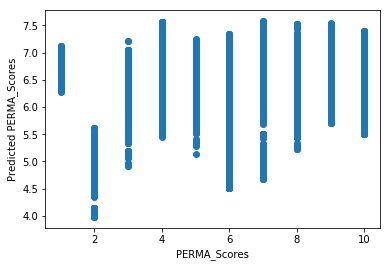

In [42]:
#PERMA Scores are from  1-10

plt.scatter(y_test, insta_y_pred)
plt.xlabel("PERMA_Scores")
plt.ylabel("Predicted PERMA_Scores")
plt.title("")
plt.show()

It is clear that the regression model doesnt give accurate predictions for all the variables at once.

# Start-Analysis

In [43]:
def subtrack_features(main_list, subtr_features):
    '''Throw away some features (columns)'''
    new = [item for item in main_list if item not in subtr_features]
    
    return new

def prepare_set_statmodel(features):
    '''Prepare input command (string) for statmodel'''
    return 'PERMA~'+ '+'.join(features)


def regression_stats(formula,data):
    '''Run a linear regression print the coefficients and return the linear model.'''
    # create a fitted model with all three features
    lm = smf.ols(formula= formula, data=data).fit()
    print lm.params
    return lm
    

In [44]:
#print len(columns)
unnecessary = ['face_age_range_high','face_age_range_low','face_mustache','face_beard','user_id','face_id']


features = subtrack_features(columns,unnecessary)
print "The number of features are: "+str(len(features))+'\n'

print prepare_set_statmodel(features)


The number of features are: 18

PERMA~image_height+image_width+data_memorability+user_followed_by+user_follows+user_posted_photos+anp_sentiment+emotion_score+data_amz_label_confidence+face_gender_confidence+face_sunglasses+face_beard_confidence+face_mustache_confidence+face_smile+face_smile_confidence+eyeglasses+eyeglasses_confidence+emo_confidence


In [45]:
metrics_df.head()

,image_id,comment_count,like_count
0,1337283311810249709_3041716852,0.0,15.0
1,1337283311810249709_3041716852,0.0,15.0
2,1337834353379743556_3041716852,0.0,23.0
3,1337834353379743556_3041716852,0.0,23.0
4,1516356155708878303_3041716852,5.0,19.0


In [46]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
lm_model = regression_stats(prepare_set_statmodel(features),image_survey)
lm_model.summary() 

Intercept                    4.656501
face_sunglasses[T.True]      0.218037
face_smile[T.True]          -0.093317
eyeglasses[T.True]          -0.230266
image_height                -0.000800
image_width                  0.003495
data_memorability            1.319950
user_followed_by             0.000133
user_follows                -0.000261
user_posted_photos          -0.000091
anp_sentiment                0.093184
emotion_score                0.243446
data_amz_label_confidence   -0.001149
face_gender_confidence       0.002184
face_beard_confidence       -0.003522
face_mustache_confidence    -0.001109
face_smile_confidence       -0.002539
eyeglasses_confidence       -0.001981
emo_confidence              -0.000136
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     3235.
Date:                Wed, 18 Oct 2017   Prob (F-statistic):               0.00
Time:                        20:34:15   Log-Likelihood:            -1.8565e+06
No. Observations:             1008036   AIC:                         3.713e+06
Df Residuals:                 1008017   BIC:                         3.713e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.6565      0.053     88.116      0.000       4.553       4.760
face_sunglasses[T.True]       0.2180      0.005     39.665      0.000       0.207       0.229
face_smile[T.True]           -0.0933      0.003    -26.769      0.000      -0.100      -0.086
eyeglasses[T.True]           -0.2303      0.004    -58.869      0.000      -0.238      -0.223
image_height                 -0.0008   1.47e-05    -54.295      0.000      -0.001      -0.001
image_width                   0.0035   4.65e-05     75.140      0.000       0.003       0.004
data_memorability             1.3200      0.029     45.204      0.000       1.263       1.377
user_followed_by              0.0001   2.91e-06     45.662      0.000       0.000       0.000
user_follows                 -0.0003   1.32e-06   -197.234      0.000      -0.000      -0.000
user_posted_photos        -9.128e-05   1.99e-06    -45.885      0.000   -9.52e-05   -8.74e-05
anp_sentiment                 0.0932      0.004     24.061      0.000       0.086       0.101
emotion_score                 0.2434      0.023     10.640      0.000       0.199       0.288
data_amz_label_confidence    -0.0011      0.000     -6.981      0.000      -0.001      -0.001
face_gender_confidence        0.0022      0.000      7.915      0.000       0.002       0.003
face_beard_confidence        -0.0035      0.000    -24.081      0.000      -0.004      -0.003
face_mustache_confidence     -0.0011      0.000     -7.223      0.000      -0.001      -0.001
face_smile_confidence        -0.0025      0.000    -22.987      0.000      -0.003      -0.002
eyeglasses_confidence        -0.0020      0.000    -12.822      0.000      -0.002      -0.002
emo_confidence               -0.0001   4.32e-05     -3.155      0.002      -0.000   -5.16e-05
==============================================================================
Omnibus:                    19926.227   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26558.653
Skew:                          -0.254   Prob(JB):                         0.00
Kurtosis:                       3.611   Cond. No.                     6.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Average the data

In [47]:
#One solution for training is to average the data as the lecturer proposed
image_survey_avg = image_survey.groupby(['user_id']).mean()
print image_survey_avg.shape
#Megeimage_survey_avg.sample(5)

(128, 57)


In [48]:
#Merge Big dataframe to metrics

image_survey_metrics = pd.merge(image_survey, metrics_df, how='inner', on='image_id')
image_survey_metrics = image_survey_metrics.dropna()
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))

The number of unique users in dataframe is: 125


In [49]:
image_survey_metrics.sample(5)

,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
1506,1376342482815974929_53918317,640.0,640.0,Normal,2016-11-04 20:53:51,0.801783,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,8.0
131554,1152250260455359778_34069800,800.0,640.0,Slumber,2015-12-31 16:22:36,0.900581,34069800.0,456.0,455.0,757.0,...,7.0,9.0,9.0,6.0,7,7.0,7,750.0,3.0,4.0
305425,1442851665840504923_31447990,640.0,640.0,Normal,2017-02-04 15:15:43,0.813756,31447990.0,191.0,223.0,377.0,...,7.0,10.0,9.0,8.0,8,2.0,8,373.0,0.0,28.0
842137,1313030352457754843_249861555,480.0,640.0,Normal,2016-08-09 12:23:57,0.855418,249861555.0,445.0,5154.0,691.0,...,7.0,5.0,7.0,6.0,6,9.0,6,689.0,1.0,11.0
978572,1156692448306664124_703978203,640.0,640.0,Normal,2016-01-06 19:28:26,0.900701,703978203.0,687.0,376.0,2277.0,...,7.0,4.0,4.0,6.0,7,4.0,7,1530.0,0.0,38.0


In [50]:
image_survey_avg = image_survey_metrics.groupby(['user_id']).mean()
print image_survey_avg.shape

(125, 59)


In [51]:
#Add the features of the metrics to the main features list
features = list(correlation_matrix)
features.append(u'like_count')
features.append(u'comment_count')
features.remove(u'user_id')
#features+['like_count','comment_count
print features

[u'image_height', u'image_width', u'data_memorability', u'user_followed_by', u'user_follows', u'user_posted_photos', u'anp_sentiment', u'emotion_score', u'data_amz_label_confidence', u'face_id', u'face_gender_confidence', u'face_age_range_high', u'face_age_range_low', u'face_sunglasses', u'face_beard', u'face_beard_confidence', u'face_mustache', u'face_mustache_confidence', u'face_smile', u'face_smile_confidence', u'eyeglasses', u'eyeglasses_confidence', u'emo_confidence', u'like_count', u'comment_count']


In [52]:
##TRY ANOTHER ONE BY EXTRACTING SOME FEATURES
### STATSMODELS ###
#We are going to fit the average of the data of the users

lm2_model = regression_stats(prepare_set_statmodel(features),image_survey_avg)
lm2_model.summary() 

Intercept                    -0.608828
image_height                 -0.000699
image_width                   0.012338
data_memorability             2.937910
user_followed_by              0.000522
user_follows                 -0.000281
user_posted_photos           -0.000530
anp_sentiment                 2.865206
emotion_score                11.056879
data_amz_label_confidence     0.036048
face_id                       0.008768
face_gender_confidence        0.004566
face_age_range_high          -0.065129
face_age_range_low            0.104064
face_sunglasses               1.693617
face_beard                    2.301895
face_beard_confidence        -0.005300
face_mustache                -0.157051
face_mustache_confidence      0.009865
face_smile                    0.063570
face_smile_confidence        -0.037842
eyeglasses                   -1.061426
eyeglasses_confidence        -0.072662
emo_confidence                0.013359
like_count                   -0.005289
comment_count            

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PERMA   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.059
Date:                Wed, 18 Oct 2017   Prob (F-statistic):              0.404
Time:                        20:34:19   Log-Likelihood:                -233.52
No. Observations:                 125   AIC:                             519.0
Df Residuals:                      99   BIC:                             592.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.6088     21.449     -0.028      0.977     -43.168      41.950
image_height                 -0.0007      0.004     -0.156      0.876      -0.010       0.008
image_width                   0.0123      0.009      1.361      0.177      -0.006       0.030
data_memorability             2.9379      7.062      0.416      0.678     -11.074      16.950
user_followed_by              0.0005      0.000      1.399      0.165      -0.000       0.001
user_follows                 -0.0003      0.000     -1.417      0.160      -0.001       0.000
user_posted_photos           -0.0005      0.000     -1.413      0.161      -0.001       0.000
anp_sentiment                 2.8652      1.700      1.685      0.095      -0.508       6.239
emotion_score                11.0569     12.037      0.919      0.361     -12.827      34.940
data_amz_label_confidence     0.0360      0.069      0.521      0.603      -0.101       0.173
face_id                       0.0088      0.017      0.516      0.607      -0.025       0.042
face_gender_confidence        0.0046      0.187      0.024      0.981      -0.366       0.375
face_age_range_high          -0.0651      0.120     -0.543      0.589      -0.303       0.173
face_age_range_low            0.1041      0.172      0.605      0.547      -0.237       0.445
face_sunglasses               1.6936      1.402      1.208      0.230      -1.088       4.476
face_beard                    2.3019      2.297      1.002      0.319      -2.256       6.860
face_beard_confidence        -0.0053      0.043     -0.123      0.902      -0.091       0.080
face_mustache                -0.1571      2.324     -0.068      0.946      -4.769       4.455
face_mustache_confidence      0.0099      0.061      0.162      0.871      -0.111       0.131
face_smile                    0.0636      0.973      0.065      0.948      -1.867       1.994
face_smile_confidence        -0.0378      0.038     -1.001      0.319      -0.113       0.037
eyeglasses                   -1.0614      0.956     -1.111      0.269      -2.958       0.835
eyeglasses_confidence        -0.0727      0.044     -1.650      0.102      -0.160       0.015
emo_confidence                0.0134      0.056      0.239      0.812      -0.098       0.124
like_count                   -0.0053      0.006     -0.843      0.401      -0.018       0.007
comment_count                 0.0874      0.169      0.516      0.607      -0.249       0.424
==============================================================================
Omnibus:                        2.528   Durbin-Watson:                   2.276
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.088
Skew:                          -0.180   Prob(JB):                        0.352
Kurtosis:                       3.520   C

In [53]:
image_survey_avg.ix[:,:10].sample(5)

/home/antonis/anaconda2/envs/marketing/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id
user_id,,,,,,,,,,
1.224423e+09,360.000000,640.000000,0.834342,1.0,18.0,41.0,-0.186200,0.114540,98.58522,120.000000
3.258937e+08,668.997093,631.802326,0.845486,1005.0,825.0,114.0,0.119227,0.175537,93.46344,48.812500
2.034076e+08,617.197092,640.000000,0.818069,860.0,710.0,98.0,0.138828,0.166058,91.68774,64.904146
1.928727e+08,640.000000,640.000000,0.869378,73.0,23.0,12.0,-0.153000,0.162620,92.93045,54.000000
8.980908e+08,640.000000,640.000000,0.923031,125.0,304.0,23.0,0.398800,0.229200,94.49217,23.000000


In [54]:
image_survey_avg.ix[:,10:20].sample(5)

,face_gender_confidence,face_age_range_high,face_age_range_low,face_sunglasses,face_beard,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence
user_id,,,,,,,,,,
3.600688e+09,99.924561,37.833333,25.000000,0.000000,1.000000,99.908686,1.000000,99.652932,0.583333,97.664293
3.452483e+08,97.522225,33.476923,20.323077,0.123077,0.169231,98.363124,0.169231,97.725448,0.830769,88.069250
1.249458e+09,99.980074,22.113636,13.306818,0.068182,0.204545,93.095893,0.136364,96.436759,0.852273,90.254599
5.552063e+07,98.997602,12.860759,6.738397,0.016878,0.088608,94.230227,0.088608,95.470556,0.578059,77.636089
1.832427e+08,99.928856,47.000000,30.000000,1.000000,1.000000,99.929230,1.000000,98.756248,1.000000,98.063812


In [55]:
image_survey_avg.ix[:,20:35].sample(5)

,eyeglasses,eyeglasses_confidence,emo_confidence,born,A_2,N_1,P_1,E_1,A_1,H_1,M_1,R_1,M_2,E_2,LON
user_id,,,,,,,,,,,,,,,
3.083783e+07,0.139752,95.993648,30.865664,1989.0,7.0,4.0,8.0,8.0,6.0,7.0,8.0,8.0,9.0,7.0,6.0
1.508580e+09,0.342857,99.382808,29.029934,1986.0,4.0,9.0,7.0,8.0,5.0,6.0,9.0,2.0,5.0,9.0,5.0
2.755107e+08,0.484375,96.945471,32.859623,1994.0,8.0,9.0,6.0,10.0,5.0,5.0,7.0,8.0,7.0,5.0,8.0
1.249458e+09,0.068182,94.535958,34.099066,1976.0,8.0,7.0,6.0,7.0,6.0,6.0,7.0,6.0,8.0,7.0,2.0
2.143581e+09,0.000000,81.273720,8.759763,1997.0,7.0,5.0,7.0,4.0,7.0,6.0,7.0,4.0,6.0,4.0,6.0


In [56]:
image_survey_avg.ix[:,35:50].sample(5)

,H_2,P_2,N_2,A_3,N_3,E_3,H_3,R_2,M_3,R_3,P_3,HAP,insta_user_id,P,E
user_id,,,,,,,,,,,,,,,
5.552063e+07,7.0,7.0,4.0,9.0,5.0,9.0,6.0,8.0,7.0,8.0,8.0,8.0,5.552063e+07,9.0,9.0
2.621365e+08,5.0,5.0,5.0,7.0,7.0,4.0,6.0,7.0,5.0,4.0,4.0,6.0,2.621365e+08,5.0,6.0
3.988856e+06,8.0,10.0,1.0,7.0,1.0,10.0,7.0,10.0,10.0,10.0,10.0,9.0,3.988856e+06,10.0,10.0
2.440471e+08,6.0,8.0,3.0,6.0,2.0,7.0,7.0,7.0,7.0,7.0,7.0,6.0,2.440471e+08,7.0,7.0
1.708321e+09,6.0,5.0,5.0,6.0,8.0,8.0,7.0,7.0,8.0,9.0,6.0,5.0,1.708321e+09,6.0,8.0


In [57]:
image_survey_avg.ix[:,50:].sample(5)

,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
user_id,,,,,,,,,
5.085324e+07,7.0,7.0,7.0,5.0,4.0,5.0,642.0,0.794974,16.472222
3.092061e+09,6.0,4.0,5.0,7.0,8.0,7.0,31.0,0.363636,6.672727
2.356714e+08,5.0,6.0,6.0,6.0,4.0,6.0,1545.0,0.871513,18.442860
4.147998e+09,7.0,8.0,6.0,7.0,7.0,7.0,77.0,1.075412,28.603824
2.498616e+08,5.0,7.0,6.0,6.0,9.0,6.0,689.0,0.315360,6.253832


In [58]:
image_survey_avg[features].head()

,image_height,image_width,data_memorability,user_followed_by,user_follows,user_posted_photos,anp_sentiment,emotion_score,data_amz_label_confidence,face_id,...,face_beard_confidence,face_mustache,face_mustache_confidence,face_smile,face_smile_confidence,eyeglasses,eyeglasses_confidence,emo_confidence,like_count,comment_count
user_id,,,,,,,,,,,,,,,,,,,,,
1619510.0,631.637000,639.040000,0.839878,364.0,814.0,2037.0,0.058673,0.166970,92.937722,65.255000,...,95.133883,0.135000,96.684532,0.822000,88.662463,0.621000,97.050382,31.631465,13.667000,0.824000
2829661.0,723.000000,640.000000,0.830652,198.0,288.0,124.0,0.019650,0.133612,85.735154,83.166667,...,90.169316,1.000000,78.655857,0.000000,93.544972,0.416667,97.065874,24.947241,16.833333,0.666667
3069744.0,619.259259,640.000000,0.838056,311.0,240.0,350.0,0.078647,0.154211,95.226040,56.641975,...,93.633254,0.222222,84.149364,0.753086,82.097430,0.246914,89.114857,29.000781,36.802469,1.802469
3988856.0,594.496032,622.222222,0.826362,732.0,943.0,610.0,0.165895,0.172209,92.637076,80.468254,...,94.844692,0.226190,95.425874,0.567460,86.408615,0.095238,95.545089,28.519007,30.067460,3.226190
4185084.0,480.000000,640.000000,0.792365,24.0,65.0,64.0,0.258200,0.146980,98.197729,92.000000,...,99.974045,1.000000,99.685265,0.000000,99.698868,1.000000,99.999550,14.343048,10.000000,0.000000


# Dump the working Dataframe to pickle-open it 

In [59]:
print 'The number of unique users in dataframe is: '+str(len(image_survey_metrics['user_id'].unique()))
print image_survey_metrics.shape
image_survey_metrics.head()


The number of unique users in dataframe is: 125
(1156203, 74)


,image_id,image_height,image_width,image_filter,image_posted_time,data_memorability,user_id,user_followed_by,user_follows,user_posted_photos,...,E,R,M,A,PERMA,N_EMO,P_EMO,imagecount,comment_count,like_count
0,1222392034123570094_53918317,640.0,640.0,Normal,2016-04-06 11:01:47,0.844465,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,2.0
1,1222392034123570094_53918317,640.0,640.0,Normal,2016-04-06 11:01:47,0.844465,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,2.0
2,1222392034123570094_53918317,640.0,640.0,Normal,2016-04-06 11:01:47,0.844465,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,2.0
3,1222392034123570094_53918317,640.0,640.0,Normal,2016-04-06 11:01:47,0.844465,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,2.0
4,1222392034123570094_53918317,640.0,640.0,Normal,2016-04-06 11:01:47,0.844465,53918317.0,100.0,174.0,105.0,...,7.0,8.0,5.0,5.0,1,8.0,1,105.0,0.0,2.0


In [61]:
print 'The number of unique images in dataframe is: '+str(len(image_survey_metrics['image_id'].unique()))


The number of unique images in dataframe is: 5343


In [60]:
import pickle
with open ('image_survey_metrics.pickle','wb') as f:
    pickle.dump(image_survey_metrics,f)